In [138]:
import pandas as pd 
import numpy as np 

#Visualisation
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import FuncFormatter, MaxNLocator
import plotly.graph_objects as go
import missingno as msno

import geopandas as gpd

#ML modules
from sklearn import datasets

from sklearn.linear_model import LinearRegression

In [139]:
df = pd.read_csv('/Users/magnus/Desktop/programming/PROJECTS/London Real Estate Analysis/London.csv')
df.head(5).T

,0,1,2,3,4
Unnamed: 0,0,1,2,3,4
Property Name,Queens Road,Seward Street,Hotham Road,Festing Road,Spencer Walk
Price,1675000,650000,735000,1765000,675000
House Type,House,Flat / Apartment,Flat / Apartment,House,Flat / Apartment
Area in sq ft,2716,814,761,1986,700
No. of Bedrooms,5,2,2,4,2
No. of Bathrooms,5,2,2,4,2
No. of Receptions,5,2,2,4,2
Location,Wimbledon,Clerkenwell,Putney,Putney,Putney
City/County,London,London,London,London,London


In [140]:
#Some general info about the dataset and statiscal summary of each column
df.info()
df.describe().transpose()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3480 entries, 0 to 3479
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Unnamed: 0         3480 non-null   int64 
 1   Property Name      3480 non-null   object
 2   Price              3480 non-null   int64 
 3   House Type         3480 non-null   object
 4   Area in sq ft      3480 non-null   int64 
 5   No. of Bedrooms    3480 non-null   int64 
 6   No. of Bathrooms   3480 non-null   int64 
 7   No. of Receptions  3480 non-null   int64 
 8   Location           2518 non-null   object
 9   City/County        3480 non-null   object
 10  Postal Code        3480 non-null   object
dtypes: int64(6), object(5)
memory usage: 299.2+ KB


,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,3480.0,1.739500e+03,1.004734e+03,0.0,869.75,1739.5,2609.25,3479.0
Price,3480.0,1.864173e+06,2.267283e+06,180000.0,750000.00,1220000.0,2150000.00,39750000.0
Area in sq ft,3480.0,1.712974e+03,1.364259e+03,274.0,834.00,1310.0,2157.25,15405.0
No. of Bedrooms,3480.0,3.103736e+00,1.517698e+00,0.0,2.00,3.0,4.00,10.0
No. of Bathrooms,3480.0,3.103736e+00,1.517698e+00,0.0,2.00,3.0,4.00,10.0
No. of Receptions,3480.0,3.103736e+00,1.517698e+00,0.0,2.00,3.0,4.00,10.0


In [141]:
df.drop(columns=(['Unnamed: 0', 'Location']), inplace=True)

#Create a new price per sq ft column 
# Check data types
print(df.dtypes)

# Convert columns to numeric if needed
df['Price'] = pd.to_numeric(df['Price'], errors='coerce')
df['Area in sq ft'] = pd.to_numeric(df['Area in sq ft'], errors='coerce')

# Check for missing values
print(df.isnull().sum())

# Drop rows with missing values or handle them appropriately
df = df.dropna()

# Check for zero values in denominator
print((df['Area in sq ft'] == 0).sum())

# Handle zero values (e.g., replace with a small value)
df['Area in sq ft'] = df['Area in sq ft'].replace(0, 0.001)

# Perform the division
df['Price per sqft'] = df['Price'] / df['Area in sq ft']


Property Name        object
Price                 int64
House Type           object
Area in sq ft         int64
No. of Bedrooms       int64
No. of Bathrooms      int64
No. of Receptions     int64
City/County          object
Postal Code          object
dtype: object
Property Name        0
Price                0
House Type           0
Area in sq ft        0
No. of Bedrooms      0
No. of Bathrooms     0
No. of Receptions    0
City/County          0
Postal Code          0
dtype: int64
0


In [142]:
df.info()
df.describe().transpose()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3480 entries, 0 to 3479
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Property Name      3480 non-null   object 
 1   Price              3480 non-null   int64  
 2   House Type         3480 non-null   object 
 3   Area in sq ft      3480 non-null   int64  
 4   No. of Bedrooms    3480 non-null   int64  
 5   No. of Bathrooms   3480 non-null   int64  
 6   No. of Receptions  3480 non-null   int64  
 7   City/County        3480 non-null   object 
 8   Postal Code        3480 non-null   object 
 9   Price per sqft     3480 non-null   float64
dtypes: float64(1), int64(5), object(4)
memory usage: 272.0+ KB


,count,mean,std,min,25%,50%,75%,max
Price,3480.0,1.864173e+06,2.267283e+06,180000.000000,750000.000000,1.220000e+06,2.150000e+06,3.975000e+07
Area in sq ft,3480.0,1.712974e+03,1.364259e+03,274.000000,834.000000,1.310000e+03,2.157250e+03,1.540500e+04
No. of Bedrooms,3480.0,3.103736e+00,1.517698e+00,0.000000,2.000000,3.000000e+00,4.000000e+00,1.000000e+01
No. of Bathrooms,3480.0,3.103736e+00,1.517698e+00,0.000000,2.000000,3.000000e+00,4.000000e+00,1.000000e+01
No. of Receptions,3480.0,3.103736e+00,1.517698e+00,0.000000,2.000000,3.000000e+00,4.000000e+00,1.000000e+01
Price per sqft,3480.0,1.066250e+03,5.776724e+02,241.610738,728.346457,9.047619e+02,1.205982e+03,7.069180e+03


<Axes: >

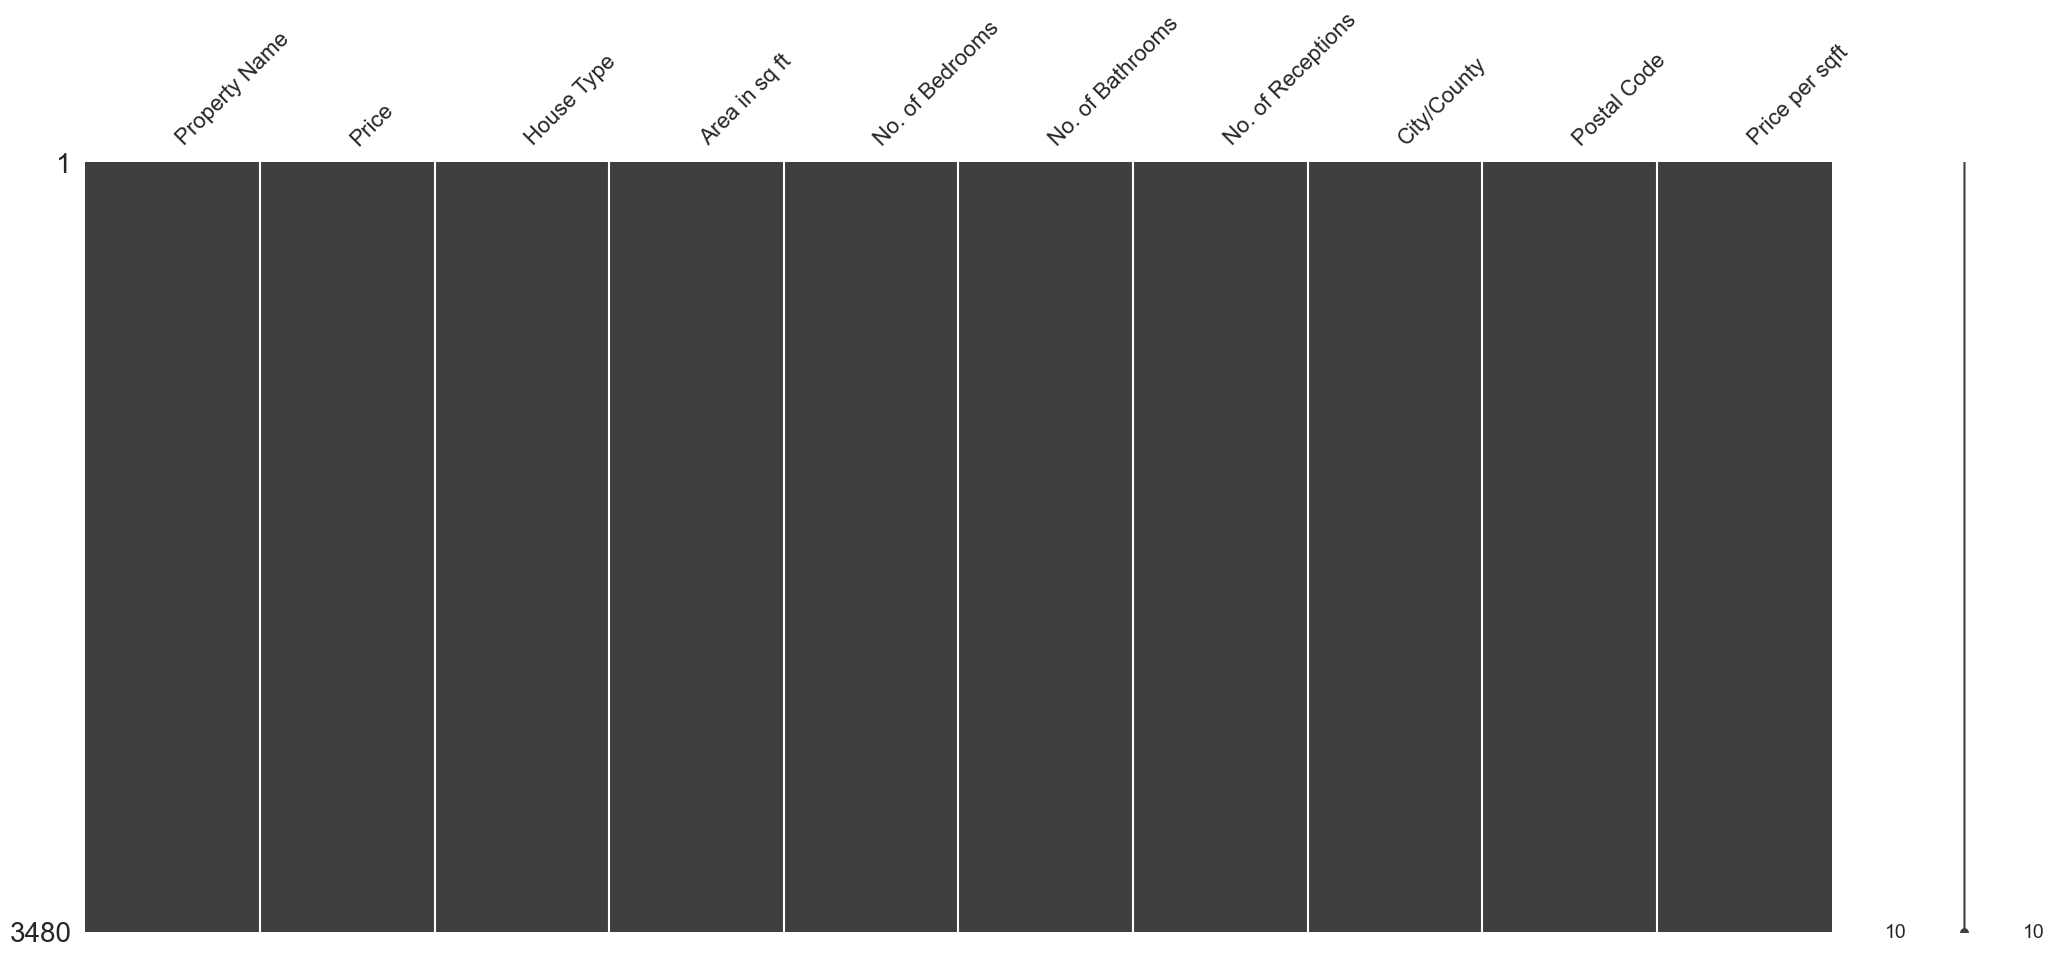

In [143]:
#Using a missing values library determine any missing or null values
msno.matrix(df)

In [144]:
unique_val = df['Postal Code'].nunique()
print(unique_val)
value_counts = df['Postal Code'].value_counts()
print(value_counts)

2845
Postal Code
SW6 3LF     14
SW6 1UE     12
SW15 2BS     9
SW11 4FA     8
SW11 2NU     8
            ..
SW13 9ET     1
W6 0HJ       1
SW18 2EJ     1
WD19 4NP     1
N6 4LP       1
Name: count, Length: 2845, dtype: int64


3 - Data Exploration

plots of proportion of House types and relationship between house types and price

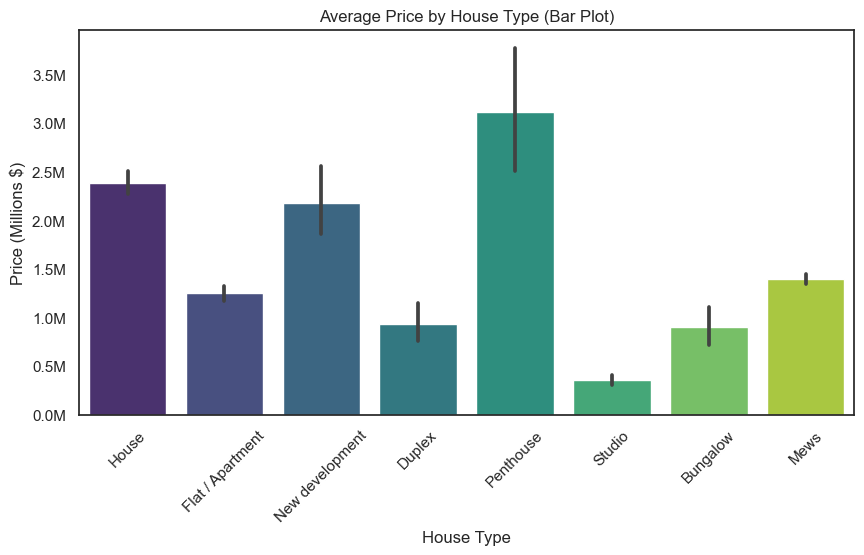

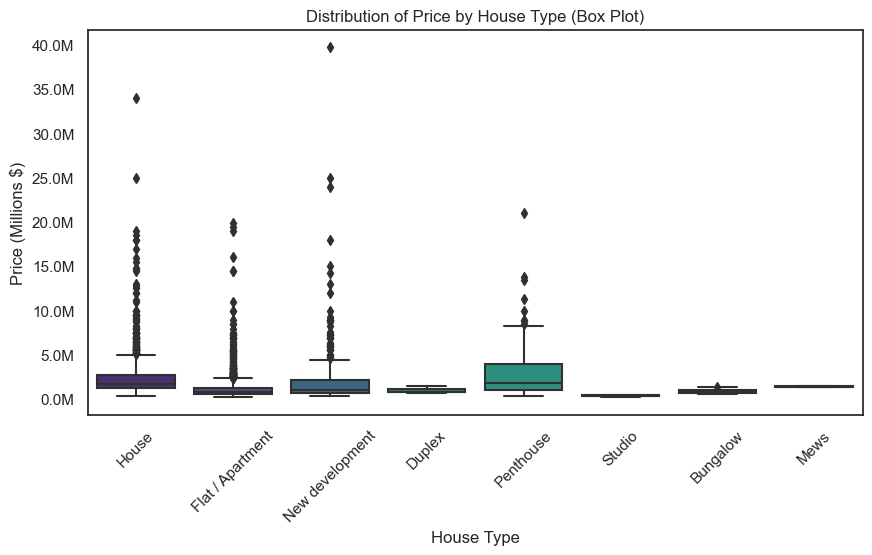

In [145]:
# Convert Price to millions
new_df = df.copy()  # Create a copy of the original DataFrame
#new_df['Price'] = df['Price'] / 1000000

# Define a function to format y-axis labels
def millions_formatter(x, pos):
    return '{:.1f}M'.format(x/1000000)

# Plotting using bar plot
plt.figure(figsize=(10, 5))
sns.barplot(data=new_df, x='House Type', y='Price', palette='viridis')
plt.title('Average Price by House Type (Bar Plot)')
plt.xlabel('House Type')
plt.ylabel('Price (Millions $)')
plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility
plt.gca().yaxis.set_major_formatter(FuncFormatter(millions_formatter))  # Format y-axis labels to display in millions
plt.show()

# Plotting using box plot
plt.figure(figsize=(10, 5))
sns.boxplot(data=new_df, x='House Type', y='Price', palette='viridis')
plt.title('Distribution of Price by House Type (Box Plot)')
plt.xlabel('House Type')
plt.ylabel('Price (Millions $)')
plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility
plt.gca().yaxis.set_major_formatter(FuncFormatter(millions_formatter))  # Format y-axis labels to display in millions
plt.show()


In [146]:
df = df[df['House Type'] != 'Penthouse']

df.describe()

,Price,Area in sq ft,No. of Bedrooms,No. of Bathrooms,No. of Receptions,Price per sqft
count,3.380000e+03,3380.000000,3380.000000,3380.000000,3380.000000,3380.000000
mean,1.827229e+06,1710.138757,3.113018,3.113018,3.113018,1053.488712
std,2.219430e+06,1373.683127,1.531250,1.531250,1.531250,562.191255
min,1.800000e+05,274.000000,0.000000,0.000000,0.000000,241.610738
25%,7.350000e+05,828.750000,2.000000,2.000000,2.000000,725.550174
50%,1.200000e+06,1300.500000,3.000000,3.000000,3.000000,900.045005
75%,2.100000e+06,2156.250000,4.000000,4.000000,4.000000,1185.773839
max,3.975000e+07,15405.000000,10.000000,10.000000,10.000000,7069.180153


In [147]:
df.describe()

,Price,Area in sq ft,No. of Bedrooms,No. of Bathrooms,No. of Receptions,Price per sqft
count,3.380000e+03,3380.000000,3380.000000,3380.000000,3380.000000,3380.000000
mean,1.827229e+06,1710.138757,3.113018,3.113018,3.113018,1053.488712
std,2.219430e+06,1373.683127,1.531250,1.531250,1.531250,562.191255
min,1.800000e+05,274.000000,0.000000,0.000000,0.000000,241.610738
25%,7.350000e+05,828.750000,2.000000,2.000000,2.000000,725.550174
50%,1.200000e+06,1300.500000,3.000000,3.000000,3.000000,900.045005
75%,2.100000e+06,2156.250000,4.000000,4.000000,4.000000,1185.773839
max,3.975000e+07,15405.000000,10.000000,10.000000,10.000000,7069.180153


Plots of  price vs no of bedrooms and no of bathrooms




In [148]:
print(df['No. of Bathrooms'].value_counts())
print(df['No. of Bedrooms'].value_counts())

No. of Bathrooms
2     1044
3      664
4      561
5      449
1      409
6      176
7       53
0       10
8       10
9        3
10       1
Name: count, dtype: int64
No. of Bedrooms
2     1044
3      664
4      561
5      449
1      409
6      176
7       53
0       10
8       10
9        3
10       1
Name: count, dtype: int64


In [149]:
df['Price'].value_counts()

Price
1250000    57
650000     54
550000     52
850000     51
2500000    48
           ..
2485000     1
572900      1
432500      1
512500      1
8650000     1
Name: count, Length: 523, dtype: int64

In [150]:
# Filter out values in 'Price' column above 15000000
df = df[df['Price'] <= 15000000]

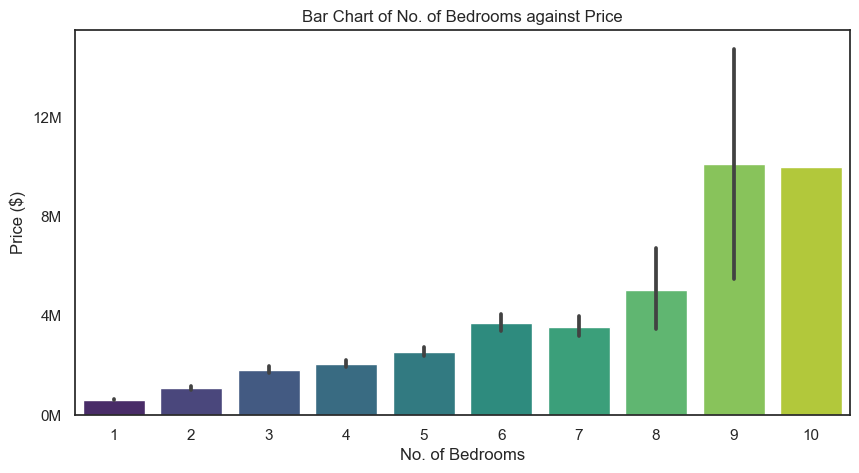

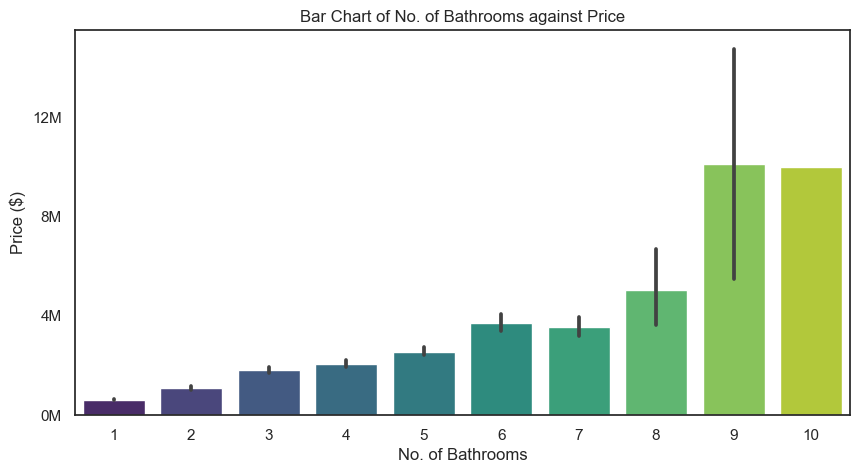

In [151]:
# Remove values of 0, 8, 9, and 10 in both columns
df = df[(df['No. of Bedrooms'] != 0) & (df['No. of Bedrooms'] <= 10)]
df = df[(df['No. of Bathrooms'] != 0) & (df['No. of Bathrooms'] <= 10)]

# Plot bar chart of No. of Bedrooms against Price
fig, ax = plt.subplots(figsize=(10, 5))
sns.barplot(data=df, x='No. of Bedrooms', y='Price', palette='viridis', ax=ax)
ax.set_title('Bar Chart of No. of Bedrooms against Price')
ax.set_xlabel('No. of Bedrooms')
ax.set_ylabel('Price ($)')
ax.grid(False)  # Remove grid lines
formatter = FuncFormatter(lambda x, _: '{:.0f}M'.format(x / 1000000))  # Format y-axis labels to display in millions
ax.yaxis.set_major_formatter(formatter)
ax.yaxis.set_major_locator(MaxNLocator(nbins=5))  # Adjust the number of ticks
plt.show()

# Plot bar chart of No. of Bathrooms against Price
fig, ax = plt.subplots(figsize=(10, 5))
sns.barplot(data=df, x='No. of Bathrooms', y='Price', palette='viridis', ax=ax)
ax.set_title('Bar Chart of No. of Bathrooms against Price')
ax.set_xlabel('No. of Bathrooms')
ax.set_ylabel('Price ($)')
ax.grid(False)  # Remove grid lines
ax.yaxis.set_major_formatter(formatter)
ax.yaxis.set_major_locator(MaxNLocator(nbins=5))  # Adjust the number of ticks
plt.show()

In [152]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3353 entries, 0 to 3479
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Property Name      3353 non-null   object 
 1   Price              3353 non-null   int64  
 2   House Type         3353 non-null   object 
 3   Area in sq ft      3353 non-null   int64  
 4   No. of Bedrooms    3353 non-null   int64  
 5   No. of Bathrooms   3353 non-null   int64  
 6   No. of Receptions  3353 non-null   int64  
 7   City/County        3353 non-null   object 
 8   Postal Code        3353 non-null   object 
 9   Price per sqft     3353 non-null   float64
dtypes: float64(1), int64(5), object(4)
memory usage: 288.1+ KB


plots of price vs area in sq ft

In [153]:
df['Area in sq ft'].max()

12546

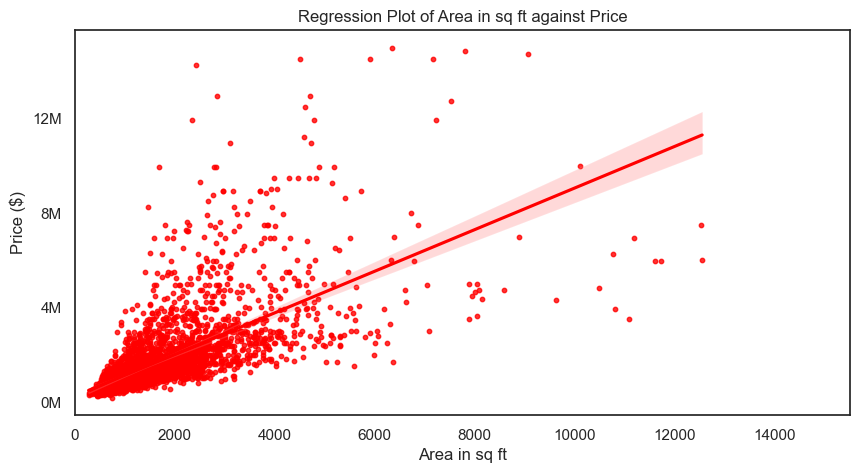

In [154]:
# Plot regression plot of 'Area in sq ft' against 'Price'
plt.figure(figsize=(10, 5))
sns.regplot(data=df, x='Area in sq ft', y='Price', color='red', marker='o', scatter_kws={'s': 10})  # Scatter_kws adjusts the size of the markers
plt.title('Regression Plot of Area in sq ft against Price')
plt.xlabel('Area in sq ft')
plt.ylabel('Price ($)')
plt.xlim(0, 15500)  # Set x-axis range

# Format y-axis labels to display in millions and avoid duplicate labels
formatter = FuncFormatter(lambda x, _: '{:.0f}M'.format(x / 1000000))
plt.gca().yaxis.set_major_formatter(formatter)
plt.gca().yaxis.set_major_locator(MaxNLocator(nbins=5))  # Adjust the number of ticks
plt.grid(False)
plt.show()

plots of location vs price, city/county vs price, postal code vs price

<Axes: >

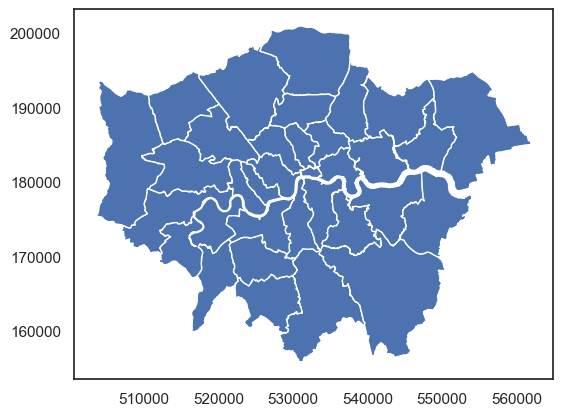

In [156]:
# Load geographical data (shapefile or GeoJSON)
# Replace 'path_to_shapefile' with the path to your shapefile or GeoJSON file
geo_data = gpd.read_file('//Users/magnus/Desktop/programming/PROJECTS/London Real Estate Analysis/London_Wards/Boroughs/London_Borough_Excluding_MHW.shp')

geo_data.plot()


In [ ]:
import geopy
from geopy.geocoders import Nominatim



In [157]:
geo_df = df[['Price', 'Postal Code']].copy()
geo_df

,Price,Postal Code
0,1675000,SW19 8NY
1,650000,EC1V 3PA
2,735000,SW15 1QL
3,1765000,SW15 1LP
4,675000,SW15 1PL
...,...,...
3475,3350000,SW6 1UE
3476,5275000,SW1A 1JT
3477,5995000,NW11 6TG
3478,6300000,W1S 3AR


In [160]:
import geopy
from geopy.geocoders import Nominatim

# Define geolocator
geolocator = Nominatim(user_agent="my_geocoder")

def my_geocoder(row):
    try:
        location = geolocator.geocode(row)
        if location:
            return pd.Series({'Latitude': location.latitude, 'Longitude': location.longitude})
        else:
                print(f"Geocoding failed for {row}. Location not found.")
                return pd.Series({'Latitude': np.nan, 'Longitude': np.nan})
    except Exception as e:
        print(f"Error geocoding {row}: {e}")
        return pd.Series({'Latitude': np.nan, 'Longitude': np.nan})

# Apply my_geocoder function to 'Postal Code' column
geo_df[['Latitude', 'Longitude']] = geo_df['Postal Code'].apply(lambda x: my_geocoder(x))

# Drop rows where Latitude or Longitude is NaN
geo_df.dropna(subset=['Latitude', 'Longitude'], inplace=True)

# Create GeoDataFrame
geo_df = gpd.GeoDataFrame(geo_df, geometry=gpd.points_from_xy(geo_df.Longitude, geo_df.Latitude))
geo_df.crs = {'init': 'epsg:4326'}

print("{}% of addresses were geocoded!".format(
    (1 - sum(np.isnan(geo_df["Latitude"])) / len(geo_df)) * 100))

geo_df.head()

Geocoding failed for N8 9JJ. Location not found.
Geocoding failed for E2 8HN. Location not found.
Geocoding failed for E2 8HN. Location not found.
Geocoding failed for E14 9YT. Location not found.
Geocoding failed for NW7 1NY. Location not found.
Geocoding failed for EC2M 4JY. Location not found.
Geocoding failed for E16 2QJ. Location not found.
Geocoding failed for E16 2QJ. Location not found.
Geocoding failed for E16 2QJ. Location not found.
Geocoding failed for SE16 7UD. Location not found.
Error geocoding SW4 9SB: HTTPSConnectionPool(host='nominatim.openstreetmap.org', port=443): Max retries exceeded with url: /search?q=SW4+9SB&format=json&limit=1 (Caused by ConnectTimeoutError(<urllib3.connection.HTTPSConnection object at 0x29004a090>, 'Connection to nominatim.openstreetmap.org timed out. (connect timeout=1)'))
Geocoding failed for EC1V 2QQ. Location not found.
Error geocoding HA6 1DU: HTTPSConnectionPool(host='nominatim.openstreetmap.org', port=443): Max retries exceeded with url

,Price,Postal Code,Latitude,Longitude,geometry
0,1675000,SW19 8NY,51.42478,-0.18949,POINT (-0.18949 51.42478)
1,650000,EC1V 3PA,51.52640,-0.09785,POINT (-0.09785 51.52640)
2,735000,SW15 1QL,51.46507,-0.22364,POINT (-0.22364 51.46507)
3,1765000,SW15 1LP,51.46910,-0.22255,POINT (-0.22255 51.46910)
4,675000,SW15 1PL,51.46342,-0.22228,POINT (-0.22228 51.46342)


In [161]:
geo_df

,Price,Postal Code,Latitude,Longitude,geometry
0,1675000,SW19 8NY,51.42478,-0.18949,POINT (-0.18949 51.42478)
1,650000,EC1V 3PA,51.52640,-0.09785,POINT (-0.09785 51.52640)
2,735000,SW15 1QL,51.46507,-0.22364,POINT (-0.22364 51.46507)
3,1765000,SW15 1LP,51.46910,-0.22255,POINT (-0.22255 51.46910)
4,675000,SW15 1PL,51.46342,-0.22228,POINT (-0.22228 51.46342)
...,...,...,...,...,...
2998,1175000,SW19 8NZ,51.42395,-0.19004,POINT (-0.19004 51.42395)
2999,360000,E9 7PJ,51.54229,-0.05302,POINT (-0.05302 51.54229)
3000,670000,SW15 6RJ,51.45592,-0.22676,POINT (-0.22676 51.45592)
3001,799500,SW4 0AB,51.46162,-0.14949,POINT (-0.14949 51.46162)


In [162]:
geo_df.drop(columns=['Price'], inplace=True)

In [163]:
geo_df

,Postal Code,Latitude,Longitude,geometry
0,SW19 8NY,51.42478,-0.18949,POINT (-0.18949 51.42478)
1,EC1V 3PA,51.52640,-0.09785,POINT (-0.09785 51.52640)
2,SW15 1QL,51.46507,-0.22364,POINT (-0.22364 51.46507)
3,SW15 1LP,51.46910,-0.22255,POINT (-0.22255 51.46910)
4,SW15 1PL,51.46342,-0.22228,POINT (-0.22228 51.46342)
...,...,...,...,...
2998,SW19 8NZ,51.42395,-0.19004,POINT (-0.19004 51.42395)
2999,E9 7PJ,51.54229,-0.05302,POINT (-0.05302 51.54229)
3000,SW15 6RJ,51.45592,-0.22676,POINT (-0.22676 51.45592)
3001,SW4 0AB,51.46162,-0.14949,POINT (-0.14949 51.46162)


In [164]:

house_data =  pd.merge(df, geo_df, on='Postal Code', how='left')
house_data.head()

,Property Name,Price,House Type,Area in sq ft,No. of Bedrooms,No. of Bathrooms,No. of Receptions,City/County,Postal Code,Price per sqft,Latitude,Longitude,geometry
0,Queens Road,1675000,House,2716,5,5,5,London,SW19 8NY,616.715758,51.42478,-0.18949,POINT (-0.18949 51.42478)
1,Seward Street,650000,Flat / Apartment,814,2,2,2,London,EC1V 3PA,798.525799,51.52640,-0.09785,POINT (-0.09785 51.52640)
2,Seward Street,650000,Flat / Apartment,814,2,2,2,London,EC1V 3PA,798.525799,51.52640,-0.09785,POINT (-0.09785 51.52640)
3,Seward Street,650000,Flat / Apartment,814,2,2,2,London,EC1V 3PA,798.525799,51.52640,-0.09785,POINT (-0.09785 51.52640)
4,Seward Street,650000,Flat / Apartment,814,2,2,2,London,EC1V 3PA,798.525799,51.52640,-0.09785,POINT (-0.09785 51.52640)


In [182]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split

# Create target object and call it y
y = house_data.Price
# Create X
features = [ 'Area in sq ft', 'No. of Bedrooms', 'No. of Bathrooms', 'No. of Receptions','Latitude','Longitude']
#This will fill NaN values using the next known non-null value in each column, propagating values backward.
X = house_data[features].fillna(method='ffill')

# Split into validation and training data
train_X, val_X, train_y, val_y = train_test_split(X, y, random_state=1)

# Define a random forest model
rf_model = RandomForestRegressor(random_state=1)
rf_model.fit(train_X, train_y)
rf_val_predictions = rf_model.predict(val_X)
rf_val_mae = mean_absolute_error(rf_val_predictions, val_y)

print("Validation MAE for Random Forest Model: {:,.0f}".format(rf_val_mae))

Validation MAE for Random Forest Model: 272,230


In [178]:
# evaluate the performance of the algorithm (MAE - MSE - RMSE)
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(val_y, rf_val_predictions))  
print('MSE:', metrics.mean_squared_error(val_y, rf_val_predictions))  
print('RMSE:', np.sqrt(metrics.mean_squared_error(val_y, rf_val_predictions)))
print('VarScore:',metrics.explained_variance_score(val_y, rf_val_predictions))



MAE: 272230.1434162487
MSE: 407759455242.55005
RMSE: 638560.455432804
VarScore: 0.8211611628653693


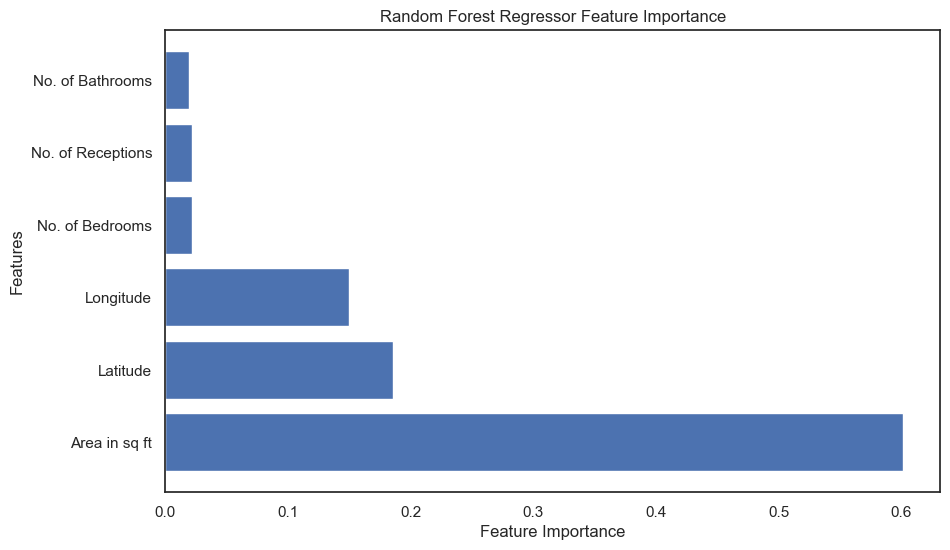

In [176]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.ensemble import RandomForestRegressor

# Define the feature names
features = ['Area in sq ft', 'No. of Bedrooms', 'No. of Bathrooms', 'No. of Receptions', 'Latitude', 'Longitude']

# Get feature importances from the trained model
importances = rf_model.feature_importances_

# Sort feature importances in descending order
sorted_indices = np.argsort(importances)[::-1]

# Rearrange feature names based on sorted feature importances
sorted_features = [features[i] for i in sorted_indices]

# Plot feature importances
plt.figure(figsize=(10, 6))
plt.barh(range(len(features)), importances[sorted_indices], align='center')
plt.yticks(range(len(features)), sorted_features)
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.title('Random Forest Regressor Feature Importance')
plt.show()


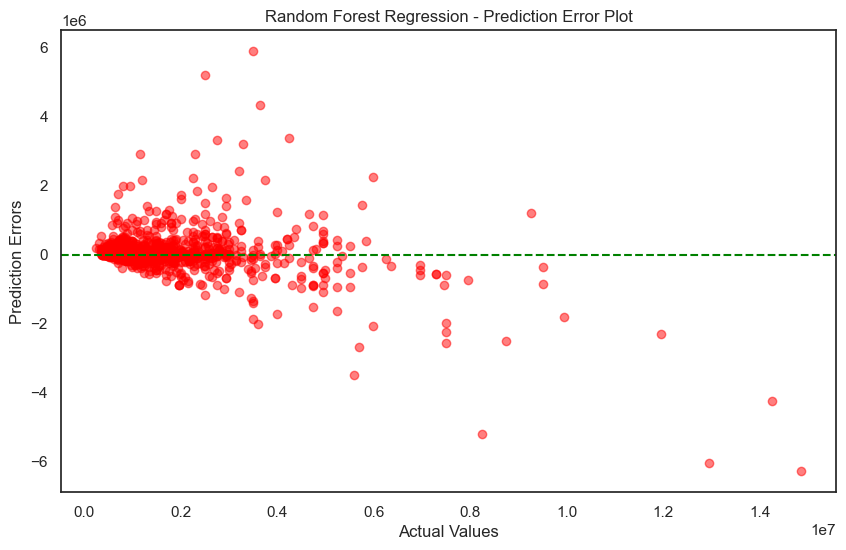

In [167]:
import numpy as np
import matplotlib.pyplot as plt

# Get predictions from the trained Random Forest model
predictions = rf_model.predict(val_X)

# Calculate prediction errors
errors = predictions - val_y

# Plot the prediction errors
plt.figure(figsize=(10, 6))
plt.scatter(val_y, errors, color='red', alpha=0.5)
plt.axhline(y=0, color='green', linestyle='--')
plt.title("Random Forest Regression - Prediction Error Plot")
plt.xlabel("Actual Values")
plt.ylabel("Prediction Errors")
plt.show()

#The x-axis represents the actual values (true labels) from the test set.
#The y-axis represents the prediction errors (the difference between predicted and actual values).
#Each point in the scatter plot represents a single data point from the test set.
#The red dashed line at y=0 indicates where the predictions are perfect (i.e., when the prediction error is zero). Points above the line indicate overpredictions, while points below the line indicate underpredictions.

In [174]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeRegressor


# Specify the range of max_leaf_nodes to search
param_grid = {'max_leaf_nodes': range(2, 500)}

# Instantiate the DecisionTreeRegressor
house_model = DecisionTreeRegressor(random_state=1)

# Instantiate GridSearchCV
grid_search = GridSearchCV(house_model, param_grid, cv=5, scoring='neg_mean_absolute_error')

# Fit the model
grid_search.fit(train_X, train_y)

# Get the best parameter
best_max_leaf_nodes = grid_search.best_params_['max_leaf_nodes']
print("Best value for max_leaf_nodes:", best_max_leaf_nodes)

# Train the model with the best parameter
house_model = DecisionTreeRegressor(max_leaf_nodes=best_max_leaf_nodes, random_state=1)
house_model.fit(train_X, train_y)

# Make predictions and calculate mean absolute error
val_predictions = house_model.predict(val_X)
val_mae = mean_absolute_error(val_predictions, val_y)
print("Validation MAE for best value of max_leaf_nodes: {:,.0f}".format(val_mae))



Best value for max_leaf_nodes: 488
Validation MAE for best value of max_leaf_nodes: 345,472


In [175]:
#compare actual output values with predicted values

df1 = pd.DataFrame({'Actual': val_y, 'Predicted': val_predictions})
df2 = df1.head(10)

In [171]:
print('MAE:', metrics.mean_absolute_error(val_y, val_predictions))  
print('MSE:', metrics.mean_squared_error(val_y, val_predictions))  
print('RMSE:', np.sqrt(metrics.mean_squared_error(val_y, val_predictions)))
print('VarScore:',metrics.explained_variance_score(val_y, val_predictions))

MAE: 345472.3077974053
MSE: 642897795438.5275
RMSE: 801809.0766750695
VarScore: 0.7174256417375136


In [172]:
#compare actual output values with predicted values
y_pred = house_model.predict(val_X)
df = pd.DataFrame({'Actual': val_y, 'Predicted': y_pred})
df1 = df.head(10)


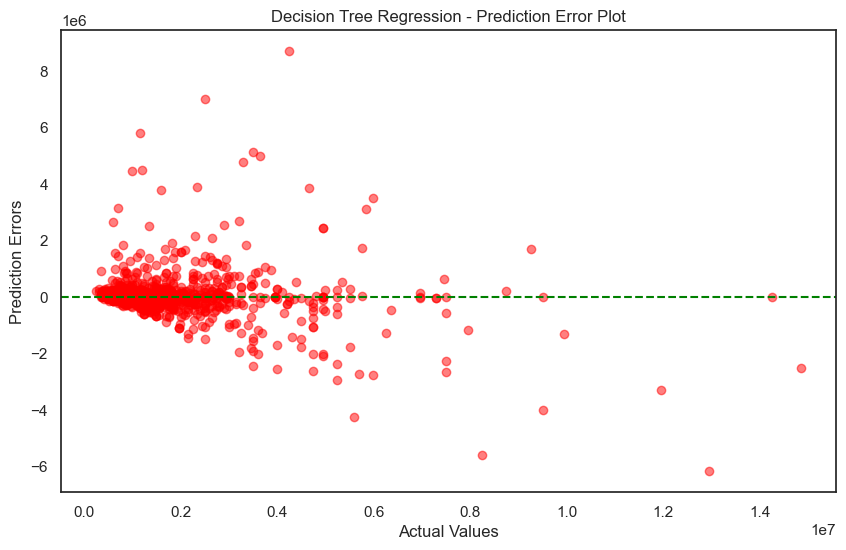

In [170]:
# Calculate prediction errors
errors = val_predictions - val_y

# Plot the prediction errors
plt.figure(figsize=(10, 6))
plt.scatter(val_y, errors, color='red', alpha=0.5)
plt.axhline(y=0, color='green', linestyle='--')
plt.title("Decision Tree Regression - Prediction Error Plot")
plt.xlabel("Actual Values")
plt.ylabel("Prediction Errors")
plt.show()